# **1. Perkenalan Dataset**


Berikut adalah informasi mengenai dataset yang digunakan:

1. **Sumber Dataset**:  
   Dataset dapat diakses pada link berikut ini : https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data
   
2. **Deskripsi Dataset:**:  
   Dataset ini berisi informasi tentang hubungan antara atribut pribadi (usia, jenis kelamin, BMI, jumlah anggota keluarga, kebiasaan merokok), faktor geografis, dan dampaknya terhadap biaya asuransi kesehatan.

3. **Fitur Dataset**:  
   - age: Usia orang yang diasuransikan.
   - sex: Jenis kelamin (pria atau wanita) dari orang yang diasuransikan.
   - bmi (Body Mass Index): Ukuran lemak tubuh berdasarkan tinggi dan berat badan.
   - children: Jumlah tanggungan anak yang ditanggung.
   - smoker: Apakah orang yang diasuransikan adalah seorang perokok (ya atau tidak).
   - region: Area geografis yang ditanggung.
   - charges: Biaya asuransi kesehatan yang dikeluarkan oleh orang yang diasuransikan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
import seaborn as sns  # Mengimpor pustaka seaborn untuk visualisasi data yang lebih cantik
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, dataset dimuat ke dalam notebook. Dataset yang dimuat berada dalam format CSV, sehingga diggunakan function `read_csv` dari library pandas untuk membacanya lalu disimpan ke dalam variabel df dalam bentuk dataframe. Selanjutnya akan ditampilkan 5 baris pertama dari dataset tersebut dengan menggunakan function `head()`.

In [3]:
# Membaca dataset
df = pd.read_csv('https://raw.githubusercontent.com/mhmmdriz/bmlp-submission/refs/heads/main/Dataset_inisiasi.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **4.1. Memahami Struktur Data**

In [4]:
# Cek jumlah baris dan kolom
print(f"Jumlah Baris: {df.shape[0]}, Jumlah Kolom: {df.shape[1]}")

Jumlah Baris: 1338, Jumlah Kolom: 7


In [5]:
# Cek tipe data setiap kolom
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


## **4.2. Menangani Data yang Hilang**

In [6]:
# Cek jumlah data yang hilang di setiap kolom
print("\nJumlah Data Null")
df.isnull().sum()


Jumlah Data Null


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Dari hasil diatas, dapat diambil kesimpulan bahwa tidak ada satupun fitur yang memiliki nilai null.

## **4.3. Analisis Distribusi dan Korelasi**

In [7]:
# Cek statistik deskriptif untuk data numerik
print("\nStatistik Deskriptif:")
df.describe()


Statistik Deskriptif:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


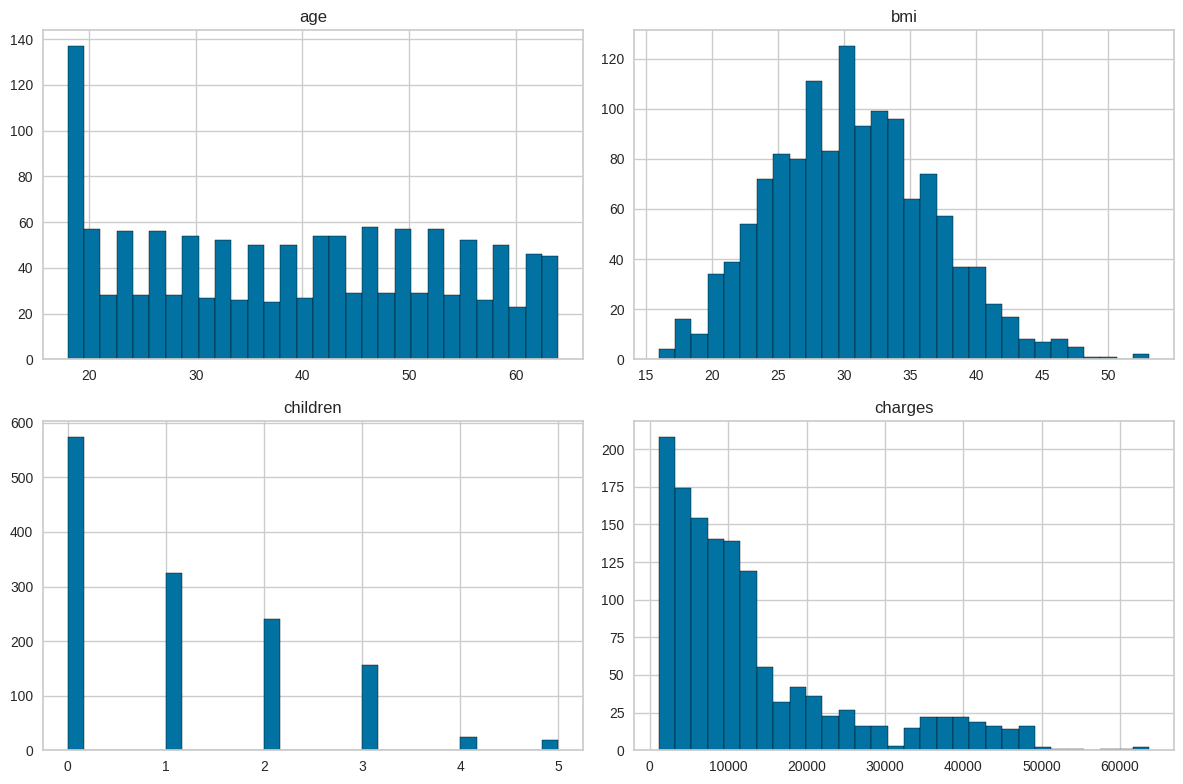

In [8]:
# Histogram untuk melihat distribusi fitur numerik
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.tight_layout()
plt.show()

Dari hasil diatas, dapat diambil kesimpulan sebagai berikut:
1. Histogram Age (Usia)   
    - Distribusi: Relatif merata, dengan pengecualian kelompok usia 18 tahun yang sangat menonjol.    
    - Insight: Usia 18 memiliki jumlah individu yang jauh lebih banyak dibanding kelompok usia lainnya. Selain itu, distribusi usia cukup tersebar mulai dari usia 18 hingga 64 tahun tanpa tren naik atau turun yang signifikan.

2. Histogram BMI (Body Mass Index)
    - Distribusi: Berbentuk normal (mendekati distribusi normal) dengan puncak pada BMI 30.
    - Insight: Sebagian besar individu memiliki BMI antara 25 hingga 35, yang menunjukkan bahwa mayoritas berada di kategori overweight atau obesitas ringan.

3. Histogram Children (Jumlah Anak)
    - Distribusi: Right-skewed (miring ke kanan).
    - Insight: Sebagian besar individu tidak memiliki anak (anak = 0), dan frekuensi individu menurun seiring bertambahnya jumlah anak yang dimiliki. Sangat sedikit yang memiliki 4 atau 5 anak.

4. Histogram Charges (Biaya Asuransi)
    - Distribusi: Right-skewed (miring ke kanan).
    - Insight: Mayoritas individu memiliki biaya asuransi di bawah 20.000. Namun ada beberapa outlier dengan biaya sangat tinggi hingga lebih dari 60.000, menunjukkan beberapa kasus ekstrem.



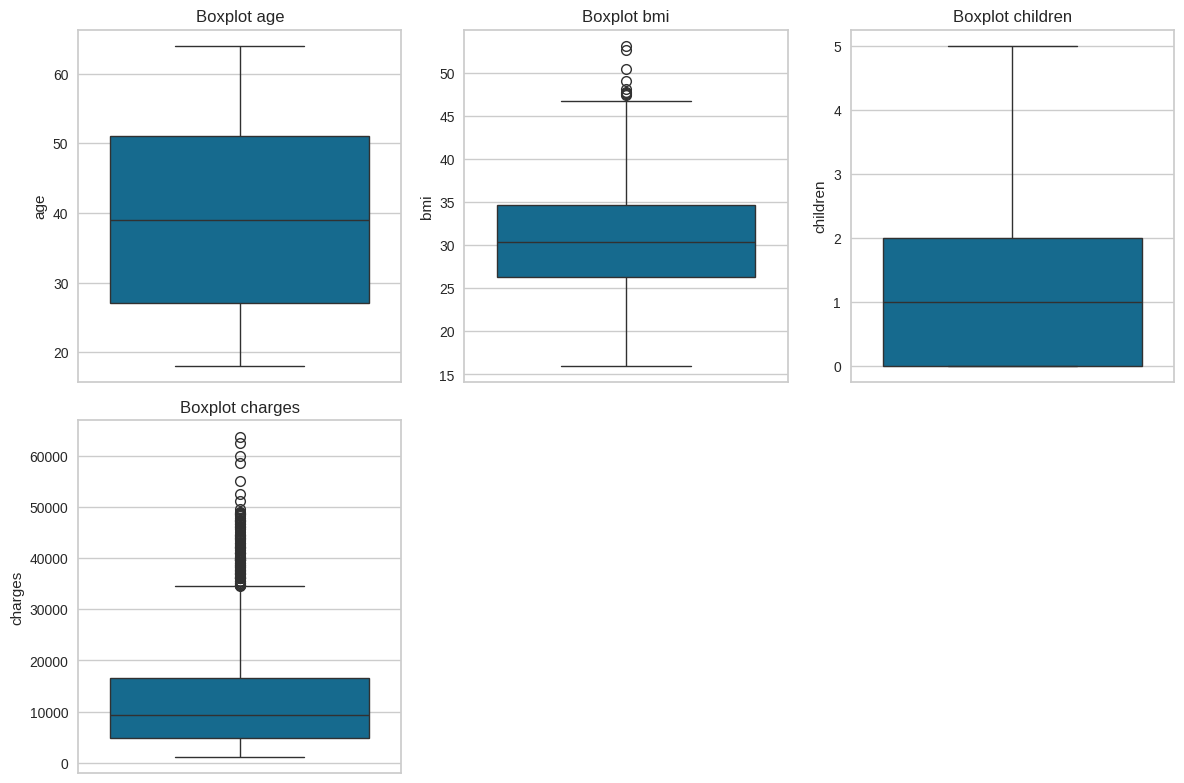

In [9]:
# Boxplot untuk fitur numerik
numerical_features = ["age", "bmi", "children", "charges"]

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot {col}")

plt.tight_layout()
plt.show()


Dari boxplot diatas dapat diketahui bahwa:
1. Pada fitur age, tidak terdapat outlier
2. Pada fitur bmi, terdapat beberapa outlier
3. Pada fitur children, tidak terdapat outlier
4. Pada fitur charges, terdapat banyak outlier

## **4.4. Visualisasi Data**

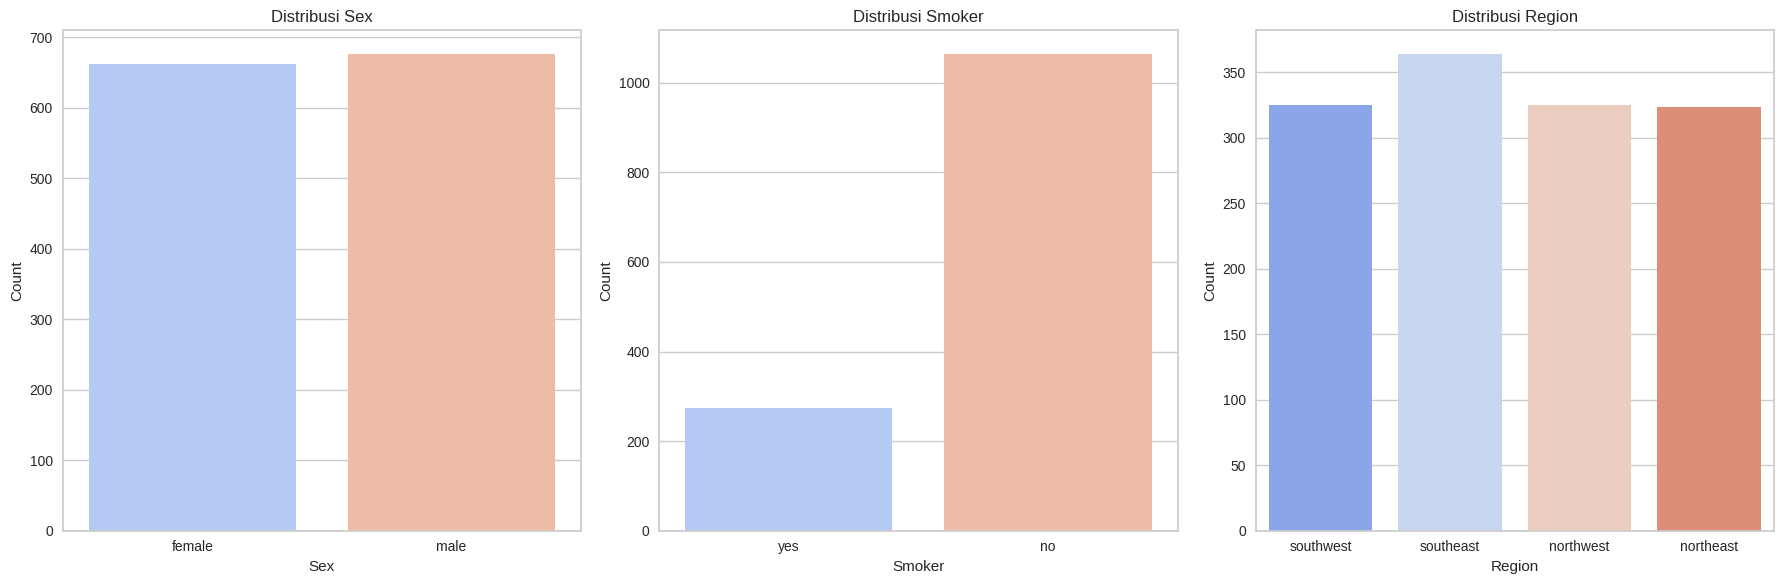

In [10]:
# Daftar fitur kategorikal yang ingin dianalisis
categorical_features = ['sex', 'smoker', 'region']

# Membuat figure dan subplots
fig, axes = plt.subplots(1, len(categorical_features), figsize=(18, 6))

# Loop untuk membuat diagram batang untuk setiap fitur kategorikal
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, ax=axes[i], palette='coolwarm', hue=feature)
    axes[i].set_title(f'Distribusi {feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Count')

# Layout adjustment
plt.tight_layout()
plt.show()

Dari diagram batang diatas, dapat diketahui bahwa:
1. Pada fitur jenis kelamin (sex), jumlah individu berjenis kelamin perempuan sedikit lebih banyak dibandingkan laki-laki, meskipun perbedaannya tidak terlalu signifikan.
2. Pada fitur status merokok (smoker), jumlah individu yang tidak merokok secara signifikan lebih tinggi dibandingkan dengan individu yang merokok.
3. Pada fitur wilayah (region), distribusi frekuensi individu di setiap wilayah relatif seimbang, tanpa perbedaan yang mencolok.

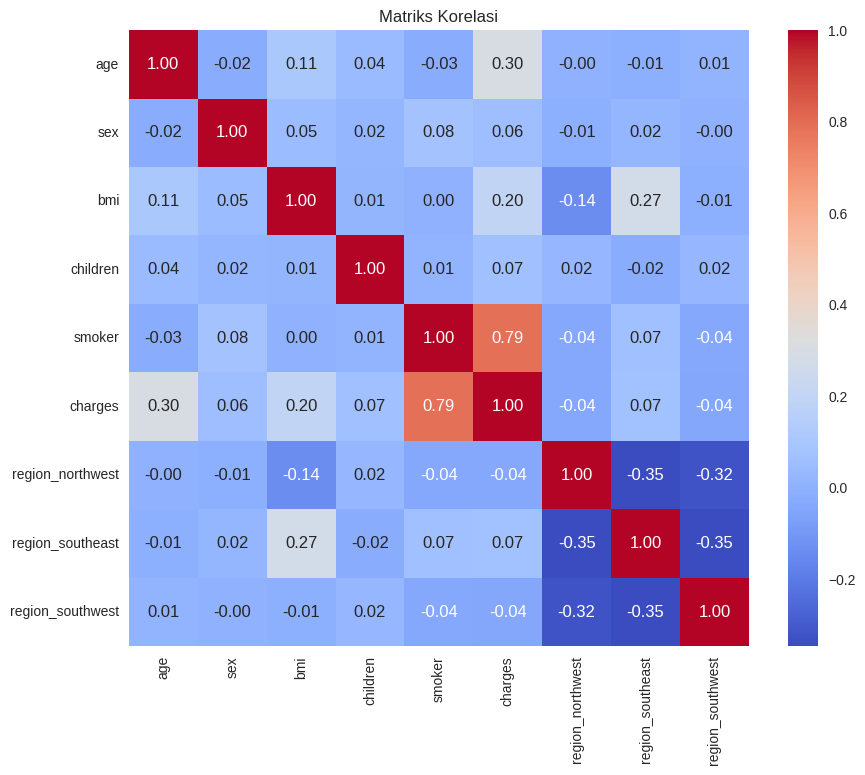

In [11]:
# Konversi data kategorikal ke numerik untuk korelasi
df_encoded = df.copy()
df_encoded['sex'] = df_encoded['sex'].map({'male': 1, 'female': 0})
df_encoded['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})
df_encoded = pd.get_dummies(df_encoded, columns=['region'], drop_first=True)

# Matriks Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

Dari heatmap / matriks korelasi diatas, dapat diketahui bahwa:
1. Fitur smoker memiliki korelasi positif yang sangat kuat terhadap fitur charges, yang artinya perokok cenderung memiliki biaya asuransi jauh lebih tinggi.
2. Korelasi antar fitur selain smoker dengan charges, tidak memiliki korelasi yang kuat.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## **5.1. Menghapus atau Menangani Data Kosong (Missing Values)**

In [12]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Dari tabel diatas dapat diketahui bahwa, tidak terdapat missing value pada tiap fitur / kolom.

## **5.2. Menghapus Data Duplikat**

In [13]:
print("\nJumlah Data Duplikat:", df.duplicated().sum())

df = df.drop_duplicates()

print("\nJumlah Data Duplikat Setelah Dihapus:", df.duplicated().sum())


Jumlah Data Duplikat: 1

Jumlah Data Duplikat Setelah Dihapus: 0


Dari output diatas, dapat diketahui bahwa terdapat 1 data duplikat, lalu dihapus dengan menggunakan function `drop_duplicates()`.

## **5.3. Normalisasi atau Standarisasi Fitur**

In [14]:
# from sklearn.preprocessing import MinMaxScaler

# # Pilih semua fitur numerik yang bukan identifier
# num_cols = df.select_dtypes(include=["number"]).columns.tolist()

# # Normalisasi semua fitur numerik
# scaler = MinMaxScaler()
# df[num_cols] = scaler.fit_transform(df[num_cols])

# print("Kolom yang dinormalisasi:", num_cols)
# df


Pada tahap preprocessing, tidak dilakukan normalisasi maupun standarisasi data. Hal ini dilakukan karena proses tersebut terbukti mengurangi pola atau informasi penting yang terkandung dalam dataset. Berdasarkan percobaan yang saya lakukan (dengan membandingkan hasil menggunakan normalisasi, standarisasi, dan tanpa keduanya) diperoleh hasil yang paling optimal ketika data dibiarkan dalam skala aslinya (tidak di normalisasi atau standarisasi).

## **5.4. Deteksi dan Penanganan Outlier**

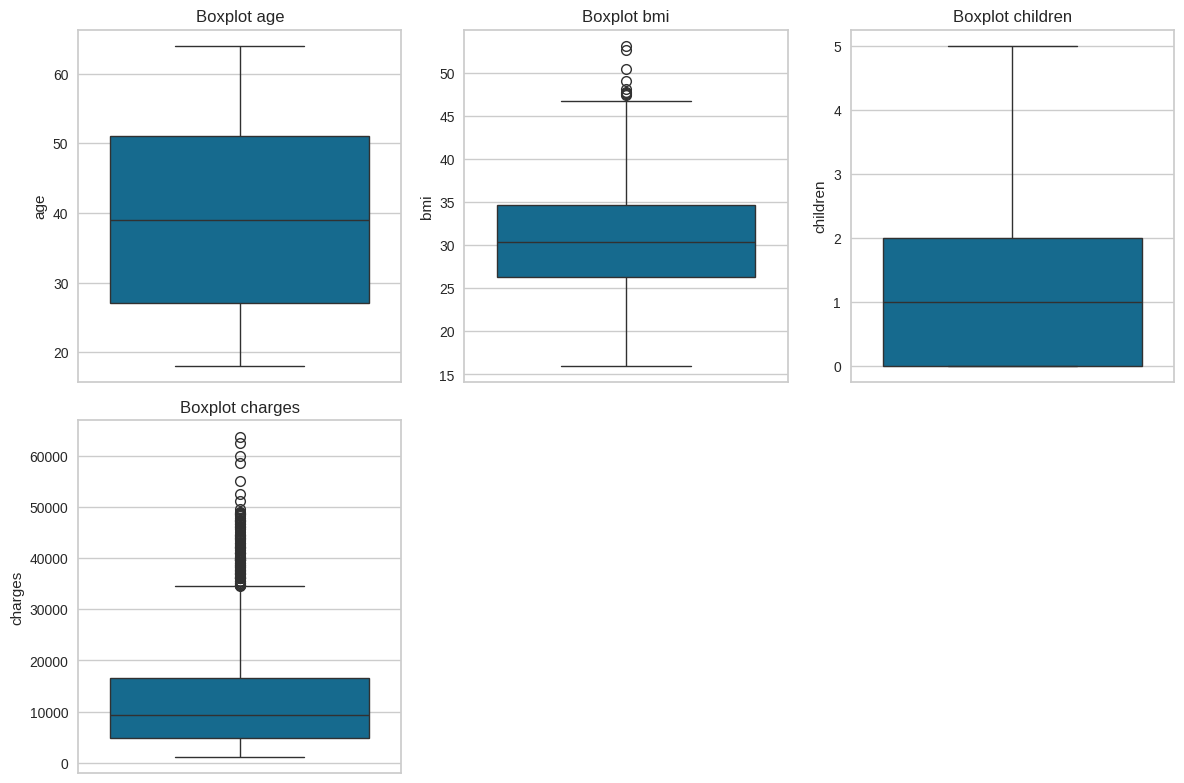

In [15]:
# Boxplot untuk fitur numerik
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot {col}")

plt.tight_layout()
plt.show()


Dari boxplot diatas dapat dilihat bahwa terdapat outlier pada fitur bmi dan charges. Sehingga perlu dilakukan penghapusan data outlier

In [16]:
for col in numerical_features:
    # Melihat outlier dengan IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Menghapus outlier dari DataFrame
    df = df.drop(outliers.index)

Pada kode diatas dilakukan penghapusan outlier yang lebih dari upper bound (batas atas) dan kurang dari lower bound (batas bawah)

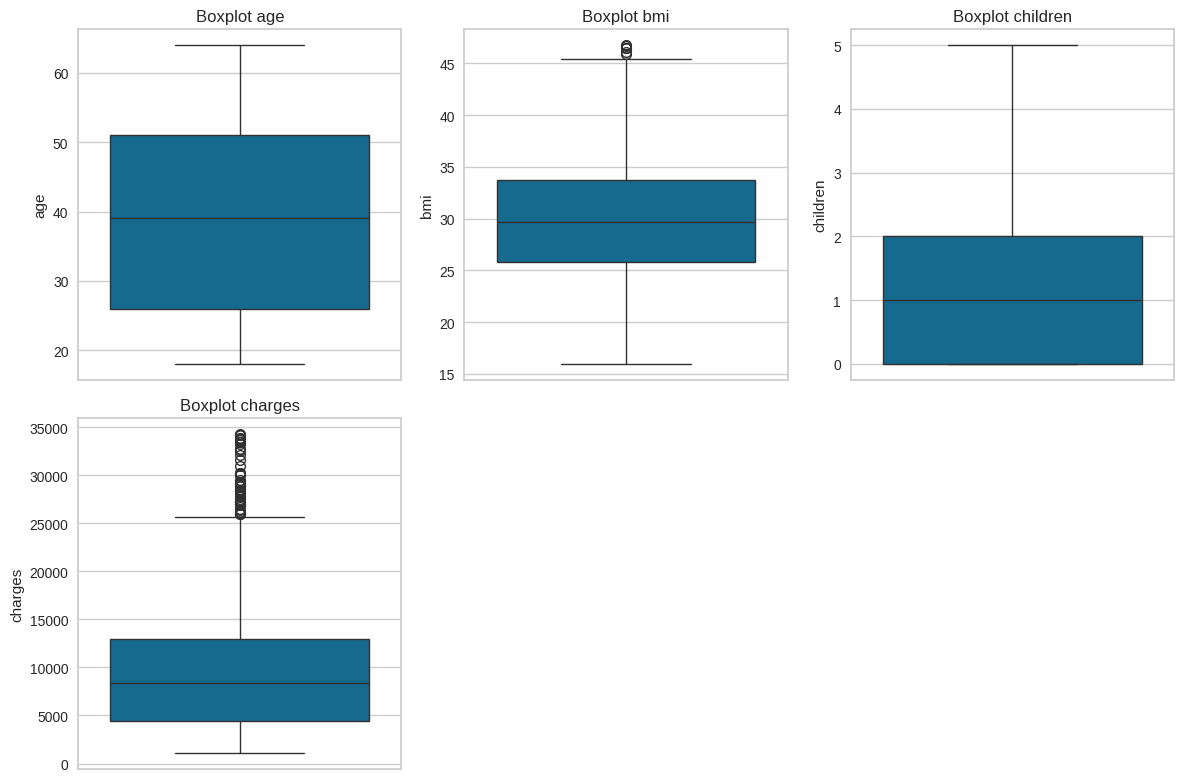

In [17]:
# Boxplot untuk fitur numerik
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot {col}")

plt.tight_layout()
plt.show()


Diagram di atas merupakan boxplot yang ditampilkan setelah proses penghapusan outlier dilakukan. Meskipun demikian, masih terlihat adanya beberapa data yang teridentifikasi sebagai outlier. Namun, pada tahap ini, penghapusan outlier tidak dilakukan lebih lanjut guna menjaga keberagaman (variasi) data yang ada, sehingga informasi yang terkandung dalam dataset tetap terjaga.

## **5.5. Encoding Data Kategorikal**

In [18]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ["sex", "smoker", "region"]

encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_cat = encoder.fit_transform(df[cat_cols])

# Buat DataFrame dari hasil encoding dengan indeks yang sama
encoded_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_cols), index=df.index)

# Gabungkan dengan dataframe asli
df_encoded = pd.concat([df.drop(columns=cat_cols), encoded_df], axis=1)

Pada kode di atas, dilakukan proses encoding terhadap data kategorikal menjadi format numerik. Langkah ini diperlukan karena algoritma K-Means Clustering melakukan pengelompokan berdasarkan perhitungan jarak, yang hanya dapat dilakukan pada data numerik. Teknik One-Hot Encoding dipilih karena metode ini dapat merepresentasikan kategori tanpa memberikan bobot atau urutan tertentu, sehingga lebih sesuai untuk menghindari distorsi jarak antar kategori yang tidak memiliki hubungan ordinal.

In [19]:
# Cek ulang dataset setelah preprocessing
print("\nInformasi Dataset Setelah Preprocessing:")
print(df_encoded.info())


Informasi Dataset Setelah Preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1190 non-null   int64  
 1   bmi               1190 non-null   float64
 2   children          1190 non-null   int64  
 3   charges           1190 non-null   float64
 4   sex_male          1190 non-null   float64
 5   smoker_yes        1190 non-null   float64
 6   region_northwest  1190 non-null   float64
 7   region_southeast  1190 non-null   float64
 8   region_southwest  1190 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 93.0 KB
None


In [20]:
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,0.0,0.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,0.0,1.0


# **6. Pembangunan Model Clustering**

## **6.1. Pembangunan Model Clustering**

Pada bagian ini, akan dilakukan pembangunan model clustering dengan model K-Means Clustering

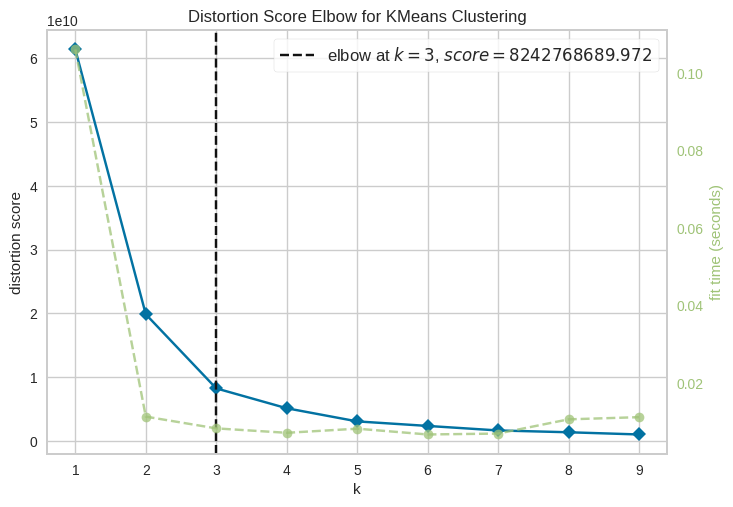

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_encoded)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

Sebelum melakukan pelatihan model, terlebih dahulu ditentukan jumlah klaster optimal menggunakan metode Elbow. Berdasarkan grafik yang ditampilkan, terlihat bahwa titik siku (elbow point) berada pada jumlah klaster 4, sehingga jumlah tersebut dipilih sebagai jumlah klaster yang optimal untuk proses clustering.

In [22]:
from sklearn.cluster import KMeans

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_encoded)

# Mendapatkan label cluster
labels = kmeans.labels_

## **6.2. Evaluasi Model Clustering**

Kemudian akan dilakukan evaluasi model clustering yang telah dibuat sebelumnya.

In [23]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_encoded, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.6051905600459361


Terlihat bahwa nilai silhouette score yang diperoleh masih relatif rendah, sehingga diperlukan langkah optimisasi lebih lanjut untuk meningkatkan kualitas hasil clustering.

## **6.3. Feature Selection (Opsional)**

Disini akan dilakukan feature selection untuk melakukan optimisasi modelnya. Pada matriks korelasi, diketahui bahwa fitur smoker dan charges memiliki korelasi yang tinggi, sehingga disini akan dicoba menghilangkan fitur smoker

In [24]:
selected_df = df_encoded[["age", "sex_male", "bmi", "children", "charges", "region_northwest", "region_southeast",	"region_southwest"]]

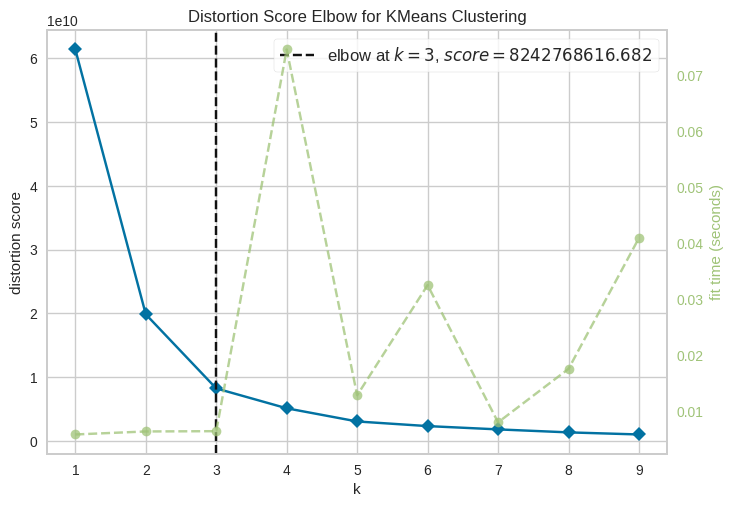

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(selected_df)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [26]:
from sklearn.cluster import KMeans

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 2
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(selected_df)

# Mendapatkan label cluster
labels = kmeans.labels_

In [27]:
from sklearn.metrics import silhouette_score

score = silhouette_score(selected_df, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.6051905643989269


Ternyata disini hasil silhouette scorenya tidak berubah secara siginifikan

## **6.4. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi dalam bentuk 2D PCA projection.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


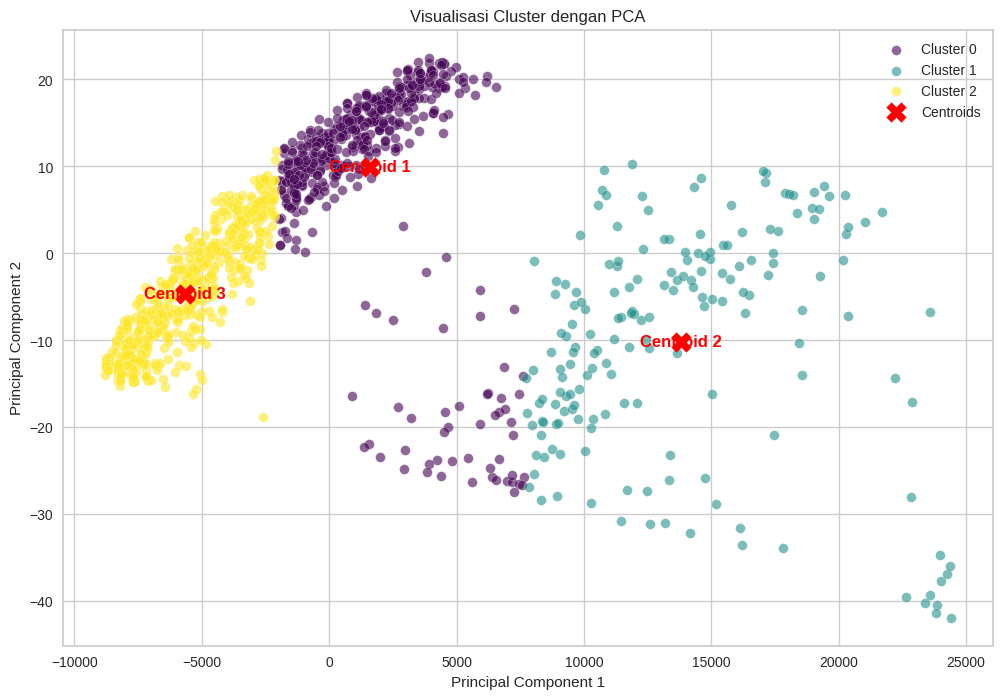

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Asumsikan selected_df adalah data hasil normalisasi dan encoding
# Lakukan PCA untuk mereduksi data ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(selected_df)

# Inisialisasi dan latih model KMeans (jumlah cluster disesuaikan)
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(selected_df)

# Proyeksikan centroid ke ruang PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Warna untuk setiap cluster
unique_labels = np.unique(cluster_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(12, 8))

# Plot setiap cluster
for label, color in zip(unique_labels, colors):
    plt.scatter(X_pca[cluster_labels == label, 0], X_pca[cluster_labels == label, 1],
                color=color, label=f'Cluster {label}', alpha=0.6, edgecolors='w', s=50)

# Plot centroid
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker="X", label='Centroids')

# Tambahkan label centroid
for i, centroid in enumerate(centroids_pca):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center', fontweight='bold')

# Tambahkan label dan grid
plt.title('Visualisasi Cluster dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

plt.show()


## **6.5. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

Disini akan dimasukkan label hasil clustering ke dalam dataframe

In [29]:
df_final = df_encoded.copy()
df_final['cluster'] = labels
df_final

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,cluster
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0,0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0,2
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0,2
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0,1
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,0.0,1.0,0.0,0.0,0
1334,18,31.920,0,2205.98080,0.0,0.0,0.0,0.0,0.0,2
1335,18,36.850,0,1629.83350,0.0,0.0,0.0,1.0,0.0,2
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,0.0,1.0,2


### Inverse Data One-Hot Encoding

In [30]:
# Mengembalikan fitur sex
df_final['sex'] = df_final['sex_male'].apply(lambda x: 'male' if x == 1.0 else 'female')

# Mengembalikan fitur smoker
df_final['smoker'] = df_final['smoker_yes'].apply(lambda x: 'yes' if x == 1.0 else 'no')

# Mengembalikan fitur region
def decode_region(row):
    if row['region_northwest'] == 1.0:
        return 'northwest'
    elif row['region_southeast'] == 1.0:
        return 'southeast'
    elif row['region_southwest'] == 1.0:
        return 'southwest'
    else:
        return 'northeast'

df_final['region'] = df_final.apply(decode_region, axis=1)

# Menghapus kolom hasil one-hot encoding
df_final = df_final.drop(columns=[
    'sex_male', 'smoker_yes',
    'region_northwest', 'region_southeast', 'region_southwest'
])

print(df_final.head())


   age     bmi  children      charges  cluster     sex smoker     region
0   19  27.900         0  16884.92400        0  female    yes  southwest
1   18  33.770         1   1725.55230        2    male     no  southeast
2   28  33.000         3   4449.46200        2    male     no  southeast
3   33  22.705         0  21984.47061        1    male     no  northwest
4   32  28.880         0   3866.85520        2    male     no  northwest


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [31]:
numeric_columns = df_final.select_dtypes(include=['number']).columns
aggregated = df_final[numeric_columns].groupby('cluster').agg(['mean', 'min', 'max'])
print(aggregated)

               age                bmi                 children          \
              mean min max       mean     min    max      mean min max   
cluster                                                                  
0        50.299107  18  64  30.572333  17.195  46.75  1.140625   0   5   
1        40.977654  18  64  28.400894  17.765  41.91  1.206704   0   5   
2        29.438721  18  48  30.038508  15.960  46.53  1.008881   0   5   

              charges                            
                 mean          min          max  
cluster                                          
0        11495.461551   7935.29115  17560.37975  
1        23703.440329  17626.23951  34303.16720  
2         4258.779532   1121.87390   7804.16050  


In [32]:
for col in categorical_features:
    print(f"Distribusi {col} per Cluster:")
    print(df_final.groupby('cluster')[col].value_counts(normalize=True) * 100)
    print("\n")

Distribusi sex per Cluster:
cluster  sex   
0        female    54.017857
         male      45.982143
1        male      50.837989
         female    49.162011
2        male      50.266430
         female    49.733570
Name: proportion, dtype: float64


Distribusi smoker per Cluster:
cluster  smoker
0        no         92.857143
         yes         7.142857
1        yes        58.100559
         no         41.899441
2        no        100.000000
Name: proportion, dtype: float64


Distribusi region per Cluster:
cluster  region   
0        northeast    27.901786
         southwest    25.892857
         northwest    24.330357
         southeast    21.875000
1        southeast    28.491620
         northwest    27.932961
         northeast    27.374302
         southwest    16.201117
2        southeast    26.998224
         northwest    25.754885
         southwest    25.754885
         northeast    21.492007
Name: proportion, dtype: float64




### Analisis Karakteristik Cluster dari Model KMeans


Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

#### **Cluster 1:**
- **Rata-rata umur:** 50.299107  
- **Rata-rata BMI:** 56.48  
- **Rata-rata charges (biaya asuransi):** 11495.461551
- Karakteristik kategorikal:
    - Mayoritas non-smoker (92.86%)
    - Jenis kelamin didominasi oleh perempuan (54.02%)
    - Wilayah terbanyak: Northeast dan Southwest
- Analisis: Cluster ini mencakup individu yang lebih tua dengan BMI tinggi dan biaya asuransi menengah. Mayoritas merupakan non-smoker dan perempuan, yang mungkin berkontribusi pada biaya asuransi yang tidak terlalu tinggi meski BMI-nya besar. Oleh karena itu, individu pada cluster ini dapat dikategorikan sebagai moderate-risk client

#### **Cluster 2:**
- **Rata-rata umur:** 40.977654  
- **Rata-rata BMI:** 82.13  
- **Rata-rata charges (biaya asuransi):** 23703.440329  
- Karakteristik kategorikal:
    - Didominasi oleh smoker (58.1%)
    - Jenis kelamin cukup seimbang
    - Wilayah dominan: Southeast dan Northwest
- Analisis: Cluster ini menunjukkan individu dengan BMI sangat tinggi, sebagian besar merupakan smoker, yang bisa menjelaskan tingginya biaya asuransi. Umur relatif lebih muda dibanding Cluster 1, namun risiko kesehatan lebih tinggi. Oleh karena itu, individu pada cluster ini dapat dikategorikan sebagai high-risk client

#### **Cluster 3:**
- **Rata-rata umur:** 29.438721  
- **Rata-rata BMI:** 18.63  
- **Rata-rata charges (biaya asuransi):** 4258.779532  
- Karakteristik kategorikal:
    - 100% non-smoker
    - Jenis kelamin seimbang
    - Wilayah cukup merata
- Analisis: Cluster ini terdiri dari individu muda, sehat (BMI rendah), dan semuanya non-smoker. Biaya asuransi rendah, konsisten dengan profil risiko yang lebih aman. Oleh karena itu, individu pada cluster ini dapat dikategorikan sebagai low-risk client

\
## Kesimpulan Interpretasi
Jadi dapat disimpulkan bahwa
1. Cluster 1: Moderate-Risk Clients
2. Cluster 2: High-Risk Clients
3. Cluster 3: Low-Risk Clients

In [33]:
label = {
    0: 'Moderate-Risk Clients',
    1: 'High-Risk Clients',
    2: 'Low-Risk Clients'
}

df_final['label'] = df_final['cluster'].map(label)
df_final = df_final.drop(columns=['cluster'])
df_final

,age,bmi,children,charges,sex,smoker,region,label
0,19,27.900,0,16884.92400,female,yes,southwest,Moderate-Risk Clients
1,18,33.770,1,1725.55230,male,no,southeast,Low-Risk Clients
2,28,33.000,3,4449.46200,male,no,southeast,Low-Risk Clients
3,33,22.705,0,21984.47061,male,no,northwest,High-Risk Clients
4,32,28.880,0,3866.85520,male,no,northwest,Low-Risk Clients
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,male,no,northwest,Moderate-Risk Clients
1334,18,31.920,0,2205.98080,female,no,northeast,Low-Risk Clients
1335,18,36.850,0,1629.83350,female,no,southeast,Low-Risk Clients
1336,21,25.800,0,2007.94500,female,no,southwest,Low-Risk Clients


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [34]:
df_final.to_csv("Dataset_clustering.csv", index=False)